In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

1.12.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images.shape)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[train_labels[10]]

(60000, 28, 28)


'T-shirt/top'

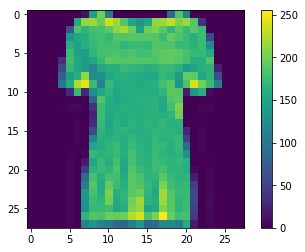

In [5]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

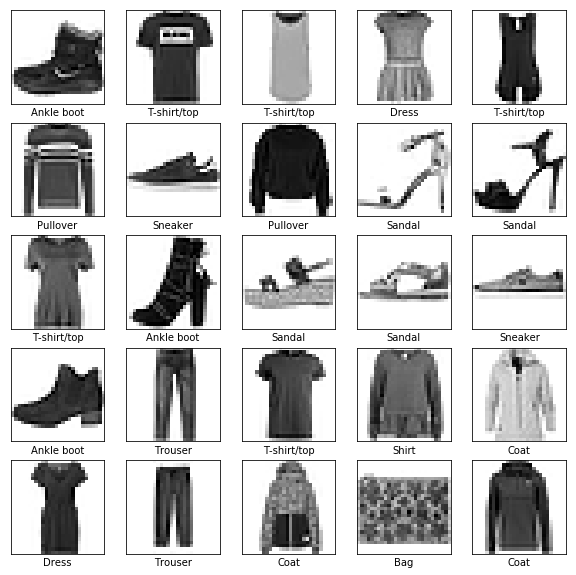

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [41]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.5025 - acc: 0.8228
Epoch 2/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.3785 - acc: 0.8638
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3406 - acc: 0.8762
Epoch 4/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.3167 - acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.2986 - acc: 0.8897


In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 0s 23us/step
Test accuracy: 0.87
Test loss: 0.3553834498643875


In [56]:
predictions = model.predict(test_images)
predictions[0]

array([6.4501080e-05, 2.0820200e-07, 5.1135544e-06, 6.5188331e-08,
       9.2652808e-06, 1.7505163e-02, 2.9326515e-05, 9.4147757e-02,
       3.6686786e-05, 8.8820195e-01], dtype=float32)

In [46]:
np.argmax(predictions[0])

9

In [50]:
test_labels[0]

9

In [51]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

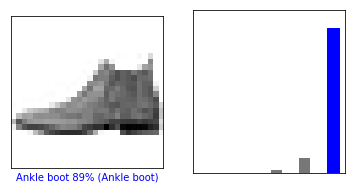

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

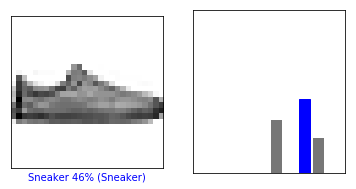

In [53]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

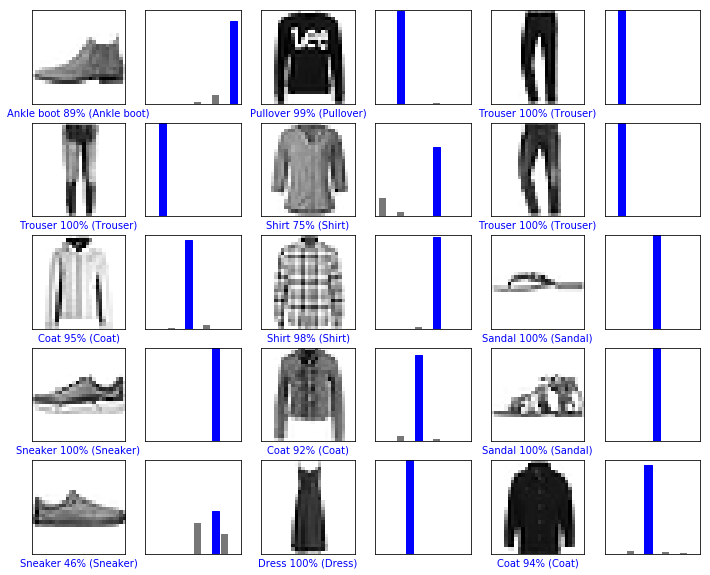

In [54]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [57]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [59]:
img = np.expand_dims(img,0)
predictions_single = model.predict(img)

print(predictions_single)

[[6.4501015e-05 2.0820160e-07 5.1135448e-06 6.5188082e-08 9.2652635e-06
  1.7505165e-02 2.9326460e-05 9.4147719e-02 3.6686863e-05 8.8820201e-01]]


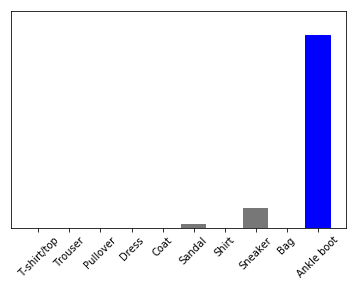

In [62]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [20]:
train_labels[100]

8

In [16]:
train_labels[59999].shape

()